### HR Prediction 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('HR.txt', sep=",")

data = dataset.copy()

In [3]:
data.shape

(14999, 10)

In [4]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [5]:
correlation = data.corr()
correlation

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


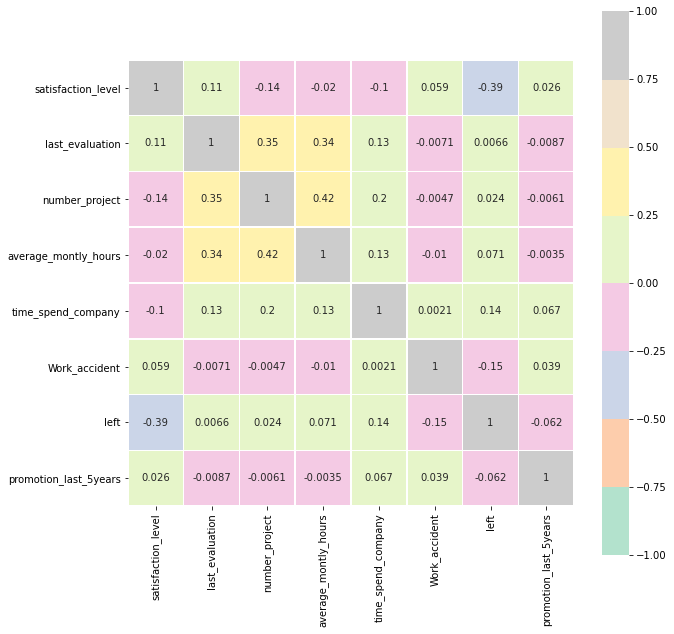

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,vmax=1,vmin=-1,square=True,annot=True,linewidths=.5,cmap="Pastel2")
plt.show()

In [11]:
data['Current_Status'] = data['left'].apply(lambda x: 'Stay' if x == 0 else 'Leave')
data.groupby(['sales','salary','Current_Status']).size()

sales        salary  Current_Status
IT           high    Leave                4
                     Stay                79
             low     Leave              172
                     Stay               437
             medium  Leave               97
                     Stay               438
RandD        high    Leave                4
                     Stay                47
             low     Leave               55
                     Stay               309
             medium  Leave               62
                     Stay               310
accounting   high    Leave                5
                     Stay                69
             low     Leave               99
                     Stay               259
             medium  Leave              100
                     Stay               235
hr           high    Leave                6
                     Stay                39
             low     Leave               92
                     Stay               

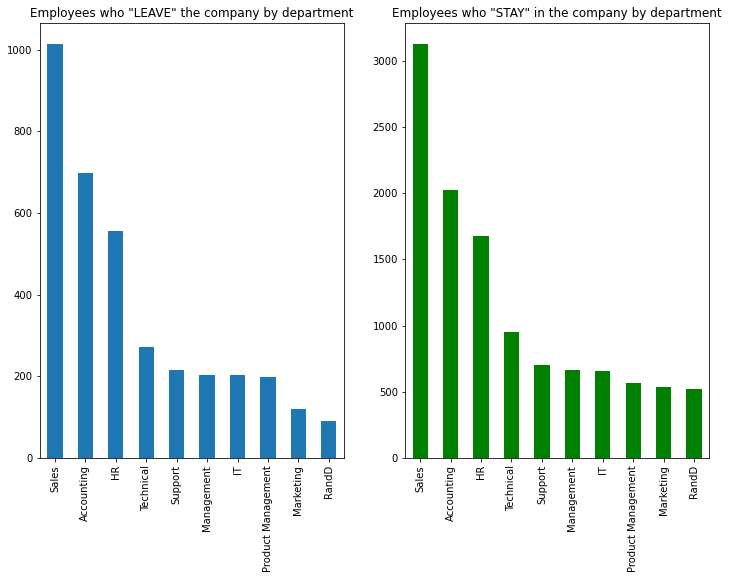

In [13]:
leave = data[(data['left'] == 1)]
stay = data[(data['left']==0)]
dept_name = data['sales'].unique()
name=['Sales','Accounting','HR','Technical','Support','Management','IT','Product Management','Marketing','RandD']
index = range(10)

plt.figure(1,figsize=(12,8))

plt.subplot(1,2,1)
leave['sales'].value_counts().plot(kind='bar')
plt.title('Employees who "LEAVE" the company by department')
plt.xticks(index,name)


plt.subplot(1,2,2)
stay['sales'].value_counts().plot(kind='bar',color='green')
plt.title('Employees who "STAY" in the company by department')
plt.xticks(index,name)
plt.show()

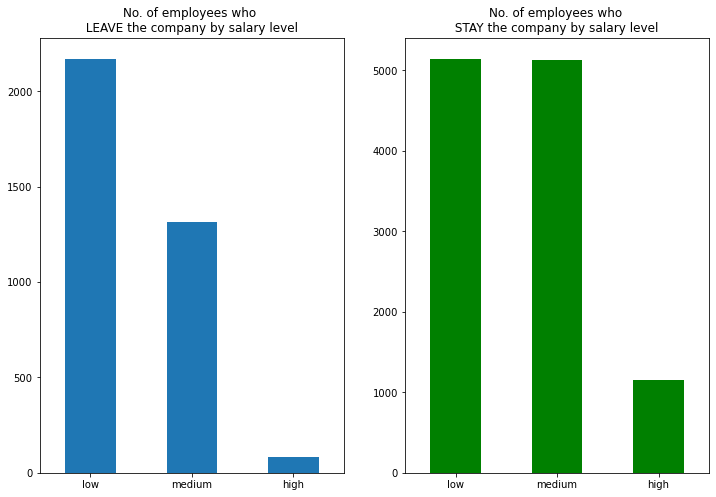

In [18]:
Leave_salary_level_count = leave['salary'].value_counts()
Stay_salary_level_count = stay['salary'].value_counts()

plt.figure(1,figsize=(12,8))
plt.subplot(1,2,1)
Leave_salary_level_count.plot(kind='bar',rot=0)
plt.title('No. of employees who \n LEAVE the company by salary level ')

plt.subplot(1,2,2)
Stay_salary_level_count.plot(kind='bar',rot=0,color='green')
plt.title('No. of employees who \n STAY the company by salary level ')
plt.show()

In [21]:
def bar_plot_dept_leave_salary(department):
    dept_leave = leave[leave['sales'] ==department]
    count = dept_leave['salary'].value_counts()
    index = [1,2,3]
    plt.bar(index,count,width=0.5, color='red')
    plt.xticks(index,['Low','Medium','High'])
    
def bar_plot_dept_stay_salary(department):
    dept_stay = stay[stay['sales'] ==department]
    count = dept_stay['salary'].value_counts()
    index = [1,2,3]
    plt.bar(index,count,width=0.5,color='green')
    plt.xticks(index,['Low','Medium','High'])

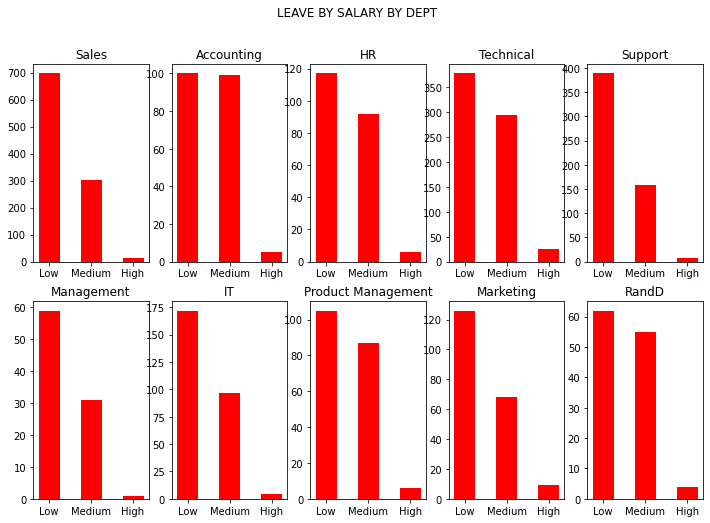

In [22]:
plt.figure(1,figsize=(12,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    bar_plot_dept_leave_salary(dept_name[i])
    plt.title(name[i])
plt.suptitle('LEAVE BY SALARY BY DEPT')
plt.show()

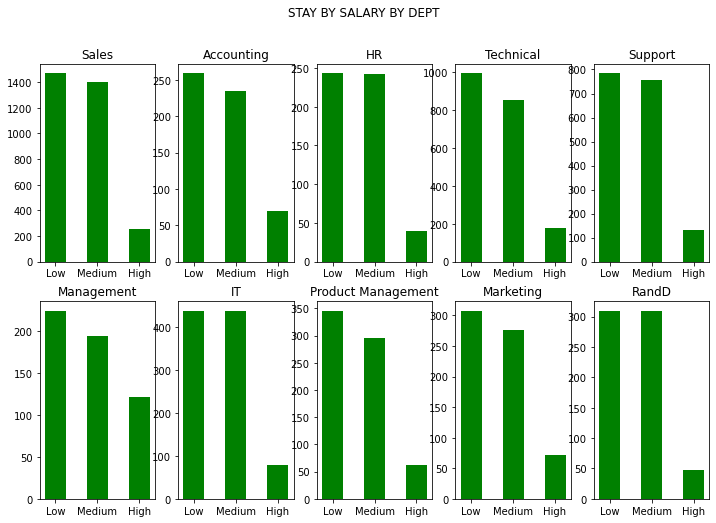

In [23]:
plt.figure(1,figsize=(12,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    bar_plot_dept_stay_salary(dept_name[i])
    plt.title(name[i])
plt.suptitle('STAY BY SALARY BY DEPT')
plt.show()

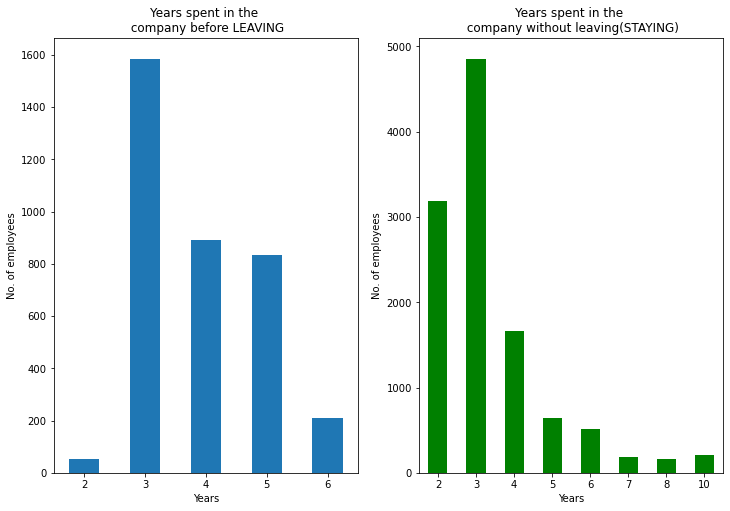

In [24]:
leave_time_spent_count = leave['time_spend_company'].value_counts().sort_index()
stay_time_spent_count = stay['time_spend_company'].value_counts().sort_index()

plt.figure(1,figsize=(12,8))
plt.subplot(1,2,1)
leave_time_spent_count.plot(kind='bar',rot=0)
plt.title('Years spent in the \n company before LEAVING')
plt.xlabel('Years')
plt.ylabel('No. of employees')

plt.subplot(1,2,2)
stay_time_spent_count.plot(kind='bar',rot=0,color='green')
plt.title('Years spent in the \n company without leaving(STAYING)')
plt.xlabel('Years')
plt.ylabel('No. of employees')
plt.show()

In [27]:
#Prediction Analysis

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [28]:
del data['sales']
del data['salary']
del data['Current_Status']

In [29]:
label = data.pop('left')
data_train,data_test,label_train,label_test = train_test_split(data, label, test_size = 0.2, random_state = 42)

In [30]:
Classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB()]

def run_classifiers(data_train,label_train,data_test,label_test):
    Training_score = []
    Testing_score = []
    Model = []
    Accuracy = []
    for classifier in Classifiers:
        Model.append(classifier.__class__.__name__)
        classifier.fit(data_train,label_train)
        Trs = classifier.score(data_train,label_train)
        Training_score.append(Trs)
        Tes = classifier.score(data_test,label_test)
        Testing_score.append(Tes)
    
        print (""+Model[i]+" training score : "+ \
        Training_score[i]+" and testing score : "+Testing_score[i])

In [31]:
Training_score = []
Testing_score = []
Model = []
def run_classifiers(data_train,label_train,data_test,label_test):
    Training_score = []
    Testing_score = []
    Model = []
    Accuracy = []
    for classifier in Classifiers:
        Model.append(classifier.__class__.__name__)
        classifier.fit(data_train,label_train)
        Training_score.append(classifier.score(data_train,label_train))
        Testing_score.append(classifier.score(data_test,label_test))
    for i in range(7):
        print (""+str(Model[i])+" training score : "+str(Training_score[i])+
               " and testing score : "+ str(Testing_score[i]))

In [32]:
run_classifiers(data_train,label_train,data_test,label_test)

C:\Users\MAFA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression training score : 0.7681473456121344 and testing score : 0.7566666666666667
KNeighborsClassifier training score : 0.9644137011417618 and testing score : 0.9443333333333334
SVC training score : 0.7852321026752229 and testing score : 0.7843333333333333
DecisionTreeClassifier training score : 0.9998333194432869 and testing score : 0.975
RandomForestClassifier training score : 0.9998333194432869 and testing score : 0.989
AdaBoostClassifier training score : 0.9597466455537962 and testing score : 0.9573333333333334
GaussianNB training score : 0.7943995332944412 and testing score : 0.7953333333333333
